In [1]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import albumentations as A

In [2]:
image_path = '/opt/ml/level2_cv_semanticsegmentation-cv-01/data/train/DCM/ID002/image1661144206667.png'

In [3]:
image = cv2.imread(image_path)

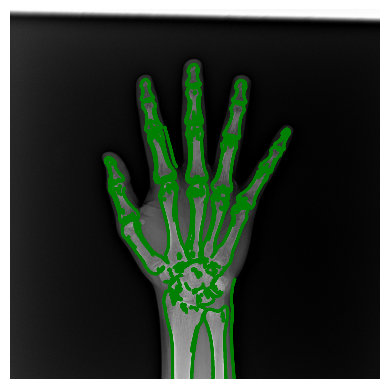

In [4]:
blur = cv2.GaussianBlur(image, (5, 5), 0)  # 가우시안 블러 적용
edges = cv2.Canny(blur, 35, 150)  # 캐니 에지 검출

# 윤곽선 추출
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 윤곽선 그리기
fig, ax = plt.subplots()
ax.imshow(image)
for contour in contours:
    ax.plot(contour[:, 0, 0], contour[:, 0, 1], 'g', linewidth=2)
ax.axis('off')

plt.show()

In [5]:
x_min, x_max, y_min, y_max = 2048, 0, 2048, 0
for contour in contours:
    x_min = min(x_min, min(contour[:, 0, 0]))
    x_max = max(x_max, max(contour[:, 0, 0]))
    y_min = min(y_min, min(contour[:, 0, 1]))
    y_max = max(y_max, max(contour[:, 0, 1]))
print(x_min, x_max, y_min, y_max)

527 1549 305 2047


In [6]:
delta = 20
x_min=x_min-delta if x_min-delta > 0 else 0
y_min=y_min-delta if y_min-delta > 0 else 0
x_max=x_max+delta if x_max+delta < 2048 else 2048
y_max=2048
transform = A.Compose([
    A.Crop(x_min=x_min, y_min=y_min, x_max=x_max, y_max=y_max),
    # A.Resize(1024, 1024)
])

In [7]:
transform_image = transform(image=image)['image']

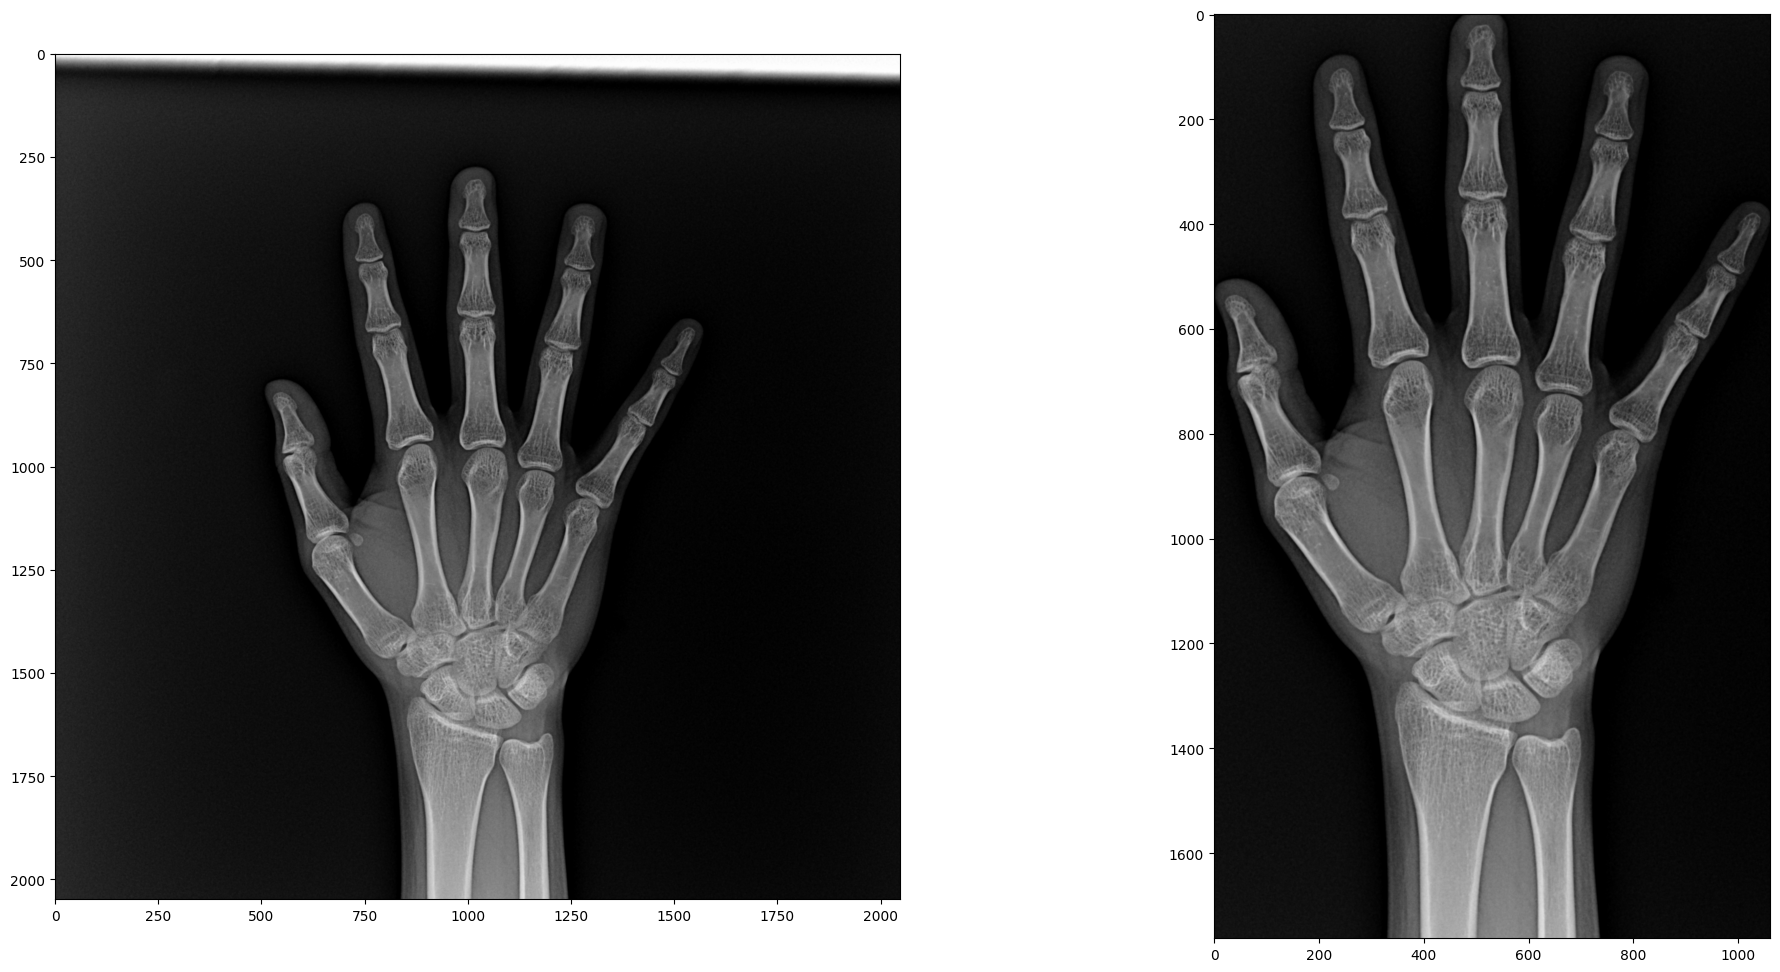

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))
ax[0].imshow(image)
ax[1].imshow(transform_image)

plt.show()

In [9]:
print(type(transform_image))
print(transform_image.shape)

<class 'numpy.ndarray'>
(1763, 1062, 3)


In [10]:
transform_image = transform_image.transpose(2, 0, 1)
pad_width = ((0, 0), (y_min, 0), (x_min, 2048-x_max))
restore_image = np.pad(transform_image, pad_width, mode='constant', constant_values=0)

In [11]:
print(y_max-y_min, x_max-x_min)

1763 1062


In [12]:
print(restore_image.shape)
restore_image = restore_image.transpose(1, 2, 0)
print(restore_image.shape)

(3, 2048, 2048)
(2048, 2048, 3)


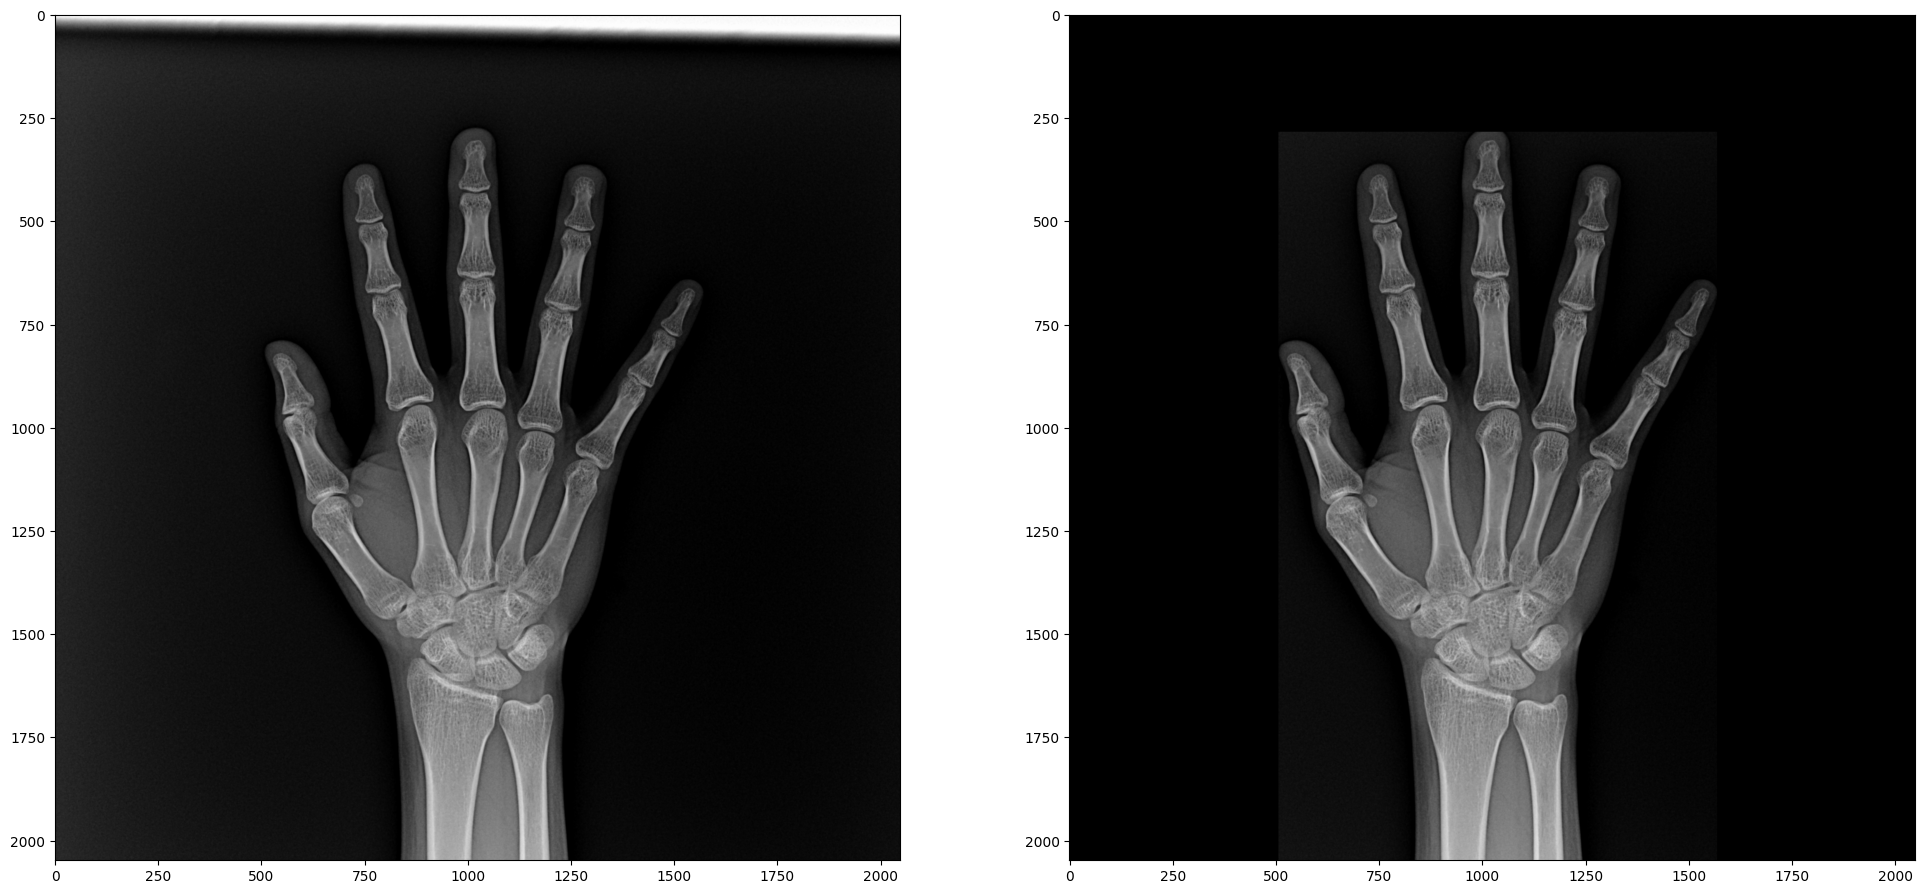

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))
ax[0].imshow(image)
ax[1].imshow(restore_image)

plt.show()

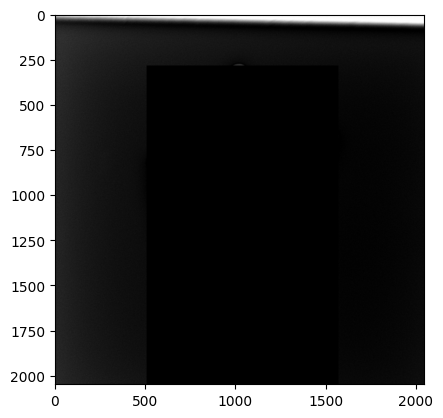

In [14]:
fig, ax = plt.subplots()
ax.imshow(image - restore_image)

plt.show()